# **"Absorption correction routines for multiple samples with arbitrary shapes.**
#### The documentation can be found at: https://arxiv.org/abs/2410.08313
#### The absorption correction program includes predefined samples like cuboids, cylinders, half-cylinders, spheres, etc.

# ----------------------------------------------------------

### **Absorption correction of a cylindical bar. **
#### The cylinder height is along k directon and the incident beam is also along k direction the scattering plane is y-z.


In [1]:
# Download and Install abscorr program
!git clone https://github.com/macsatncnr/abscorrpython
%cd abscorrpython
import numpy as np
import abscorr as abcr
import time

Cloning into 'abscorrpython'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 27 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (27/27), 87.76 KiB | 1.37 MiB/s, done.
Resolving deltas: 100% (13/13), done.
/content/abscorrpython


In [3]:
def cylinder90_smpl_transm(theta,twotheta,**kwargs):
    """
    Transmission of a long cylinder laying in the y-z plane.

    Parameters
    ----------
    theta : float
        theta value
    twotheta : fluat
        twotheta value.

    Returns
    -------
    absorption : float
        Calculated transmission given a theta and twotheta value
        for a sample define as a cylinder The cylinder height is along k directon
        and the incident beam is also along k direction the scattering plane is y-z.



        The Circumference of the cylinder is defined in the x-y plane
        the height of the cylinder is defined along the z plan.

       the value o sample theta is 0 when the incident beam s0
       is pointing along the z direction.

    """

    s0=[0.0,0.0,1.0]    #   Incident beam
    s=[0.0,0.0,1.0]     #   Scattered beam
    r=0.5
    l=4.0
    mu_ei=4.0
    mu_ef=4.0
    sphere_smpl=abcr.cylinder_sample(r,l)
    ss0=abcr.srotyz(s0,-1*theta)
    ss=abcr.srotyz(abcr.srotyz(s,-1*theta),twotheta)
    transm=abcr.integ(ss0, ss, sphere_smpl,mu_ei,mu_ef)
    print(theta,twotheta,transm)
    if 'file_out' in kwargs:
       file2write=kwargs["file_out"]
       with open(file2write, 'a') as ff:
           np.savetxt(ff,[[theta,twotheta,transm]],fmt='%1.3f',delimiter='\t')

    if 'return_list' in kwargs:
        return_list=kwargs["return_list"]
        return_list.append([theta,twotheta,transm])
    return transm

### **Trans_sample_sequential** receives a two-column list [theta, twotheta] and calls boxsmpltransm to calculate the transmission for each theta-twotheta sample orientation.

In [4]:
def trans_sample_sequential(angles,**kwargs):
    """
    Parameters
    ----------

    angles:
                angles :    Two columns list [theta, twotheta]
                            List with two columns list of floats
                            [theta, twotheta] values to compute transmission.

                            String
                            if  angles is a "string" then angles is a file name
                            with the angles theta_twotheta.
                            The file  must have two columns list of floats  [theta, twotheta]


    **kwargs :  file_out :  file to save the calculated transmission with 3 columns:
                            [theta, twotheta, transmission]

    Returns
    -------
                A list with with three columns [theta, twotheta, transmission]
    """
    startime=time.time()
    if type(angles)==str:
        file2read=angles
        with open(file2read, 'r') as ff:
            angles=np.loadtxt(ff)

    if 'file_out' in kwargs:
       file2write=kwargs["file_out"]
       ff=open(file2write, 'w')
       ff.close()

    transmi=[cylinder90_smpl_transm(angle[0],angle[1],**kwargs) for angle in angles]

    print('done.', time.time()-startime)
    return transmi

### **Trans_terst** creates an array of theta and twotheta angles and calls trans_sample_sequential to calculate the transmission.

In [19]:
def trans_test():
    """

    Returns
    -------
    None.

    Calculate the transmission sequencially and save it to test_cylinder90.txt'
    For multiprocessign see file cylinder_90deg_mpt.py


    """
    range_theta=[0,360,20]
    range_twotheta=[0,200,20]
    angles=abcr.generate_Sample_theta_2theta(range_theta, range_twotheta)
    file_out='test_cylinder90.txt'
    trans_sample_sequential(angles,file_out=file_out)


### Plot the transmission.

In [20]:
def plot_transmission():
    abcr.generate_contour_plot("test_cylinder90.txt")

### Call trans_test and plot_transmission

In [ ]:
trans_test()
plot_transmission()

0 0 1.1253517471957004e-07
0 20 0.006732977253919513
0 40 0.012391364276849798
0 60 0.01625191707846213
0 80 0.01815778467746129
0 100 0.021492175312737394
0 120 0.027682059677399548
0 140 0.030677432159401812
0 160 0.03163021090403801
0 180 0.030813542008785926
20 0 0.0137966372493836
20 20 0.00673297725391951
20 40 0.05731318320537995
20 60 0.07613754515120194
20 80 0.08538047805897354
20 100 0.08930959307376245
20 120 0.09259270213078295
20 140 0.09638926277298016
20 160 0.09339760610964533
20 180 0.079938686784472
40 0 0.028664480590334454
40 20 0.020390536265437263
40 40 0.012391364276849793
40 60 0.07613754515120197
40 80 0.10605769896034029
40 100 0.12114932674715805
40 120 0.1273473061883338
40 140 0.13037674736580315
40 160 0.13071269333137786
40 180 0.12020112602035703
60 0 0.04299110059403241
60 20 0.0351094816515514
60 40 0.025212842765850046
60 60 0.016251917078462127
60 80 0.08538047805897354
60 100 0.12114932674715803
60 120 0.13968285275662645
60 140 0.14720244939812177

(180, 3)


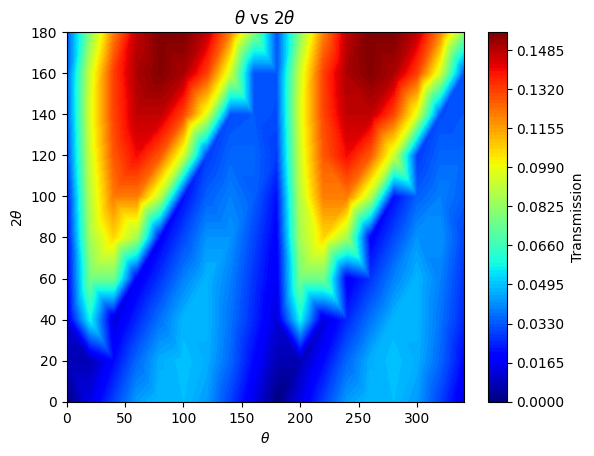

In [22]:
plot_transmission()

Download file.

In [18]:
from google.colab import files
files.download("test_cylinder90.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>